## 1. Data Ingestion & Quality Profiling

### 1.1 Load & Inspect

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots inside the notebook
%matplotlib inline

# 1.1 – Read the CSV file
df = pd.read_csv("car_prices.csv")


print("First 5 rows:")
display(df.head())

print("\nBasic info:")
print(df.info())

print("\nTotal number of records:", len(df))


First 5 rows:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)



Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40076 entries, 0 to 40075
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          40076 non-null  int64  
 1   make          39883 non-null  object 
 2   model         39881 non-null  object 
 3   trim          39738 non-null  object 
 4   body          38797 non-null  object 
 5   transmission  34778 non-null  object 
 6   vin           40076 non-null  object 
 7   state         40075 non-null  object 
 8   condition     29147 non-null  float64
 9   odometer      40008 non-null  float64
 10  color         39955 non-null  object 
 11  interior      39955 non-null  object 
 12  seller        40075 non-null  object 
 13  mmr           40075 non-null  float64
 14  sellingprice  40075 non-null  float64
 15  saledate      40075 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 4.9+ MB
None

Total number of records: 40076


### 1.2 Understanding the Data Structure  

We will also create a small helper that maps the **logical names** we need (price, brand, year, etc.)  
to the **actual column names** present in your CSV.


In [6]:
print("Shape of the dataset (rows, columns):", df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

# --- Helper: detect important columns automatically ---
candidate_columns = {
    "price": ["sellingprice", "selling_price", "price", "Selling_Price", "sellingPrice"],
    "brand": ["make", "brand", "Brand", "Make"],
    "model": ["model", "Model", "model_name", "Model_Name"],
    "year": ["year", "model_year", "Year", "Model_Year"],
    "odometer": ["odometer", "mileage", "Odometer", "Mileage"],
    "condition": ["condition", "Condition", "condition_score", "Condition_Score"],
    "state": ["state", "State", "state_or_province"],
    "color": ["color", "Color", "exterior_color", "Exterior_Color"],
    "interior": ["interior", "Interior", "interior_color", "Interior_Color"],
}

col_map = {}

for logical_name, candidates in candidate_columns.items():
    for c in candidates:
        if c in df.columns:
            col_map[logical_name] = c
            break

print("\nDetected column mapping (logical_name -> actual column):")
for k, v in col_map.items():
    print(f"{k:10s} -> {v}")

# Optional: you can manually adjust any incorrect mapping here, e.g.
# col_map["price"] = "selling_price"


Shape of the dataset (rows, columns): (40076, 16)

Column names:
['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']

Data types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

Detected column mapping (logical_name -> actual column):
price      -> sellingprice
brand      -> make
model      -> model
year       -> year
odometer   -> odometer
condition  -> condition
state      -> state
color      -> color
interior   -> interior


### 1.3 Missing & Anomaly Detection

Null values per column:


,null_count,null_percent
year,0,0.00
make,193,0.48
model,195,0.49
trim,338,0.84
body,1279,3.19
transmission,5298,13.22
vin,0,0.00
state,1,0.00
condition,10929,27.27
odometer,68,0.17


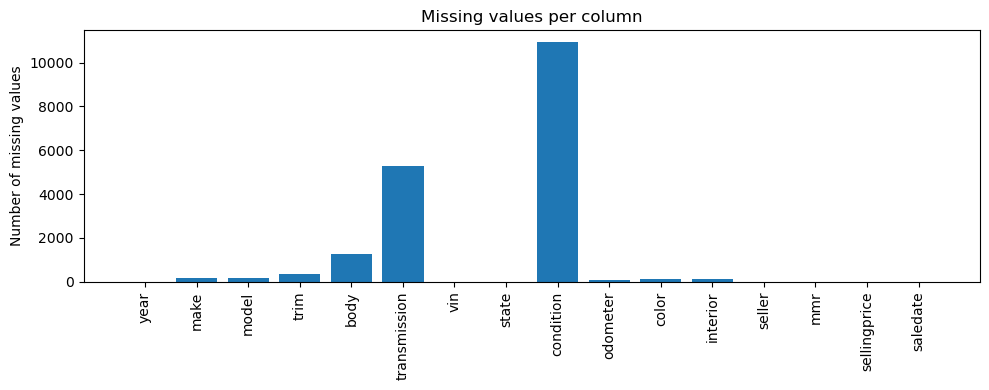


Null values after imputation:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Number of duplicate records: 0


In [7]:
# 1.3.1 – Quantify nulls per column
null_counts = df.isna().sum()
null_percent = (null_counts / len(df)) * 100

print("Null values per column:")
display(pd.DataFrame({
    "null_count": null_counts,
    "null_percent": null_percent.round(2)
}))

# Visualize missing values using a simple bar chart
plt.figure(figsize=(10, 4))
plt.bar(null_counts.index, null_counts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of missing values")
plt.title("Missing values per column")
plt.tight_layout()
plt.show()

# 1.3.2 – Resolve null values
# Strategy:
# - Numeric columns: fill with median
# - Categorical columns: fill with mode (most frequent)
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

for col in numeric_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

print("\nNull values after imputation:")
print(df.isna().sum())

# 1.3.3 – Duplicates
dup_count = df.duplicated().sum()
print("\nNumber of duplicate records:", dup_count)

if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)


## 2. DataFrame Queries

### 2.1 Calculate the average, minimum, and maximum car price

In [8]:
price_col = col_map.get("price")
if price_col is None:
    raise KeyError("Price column not detected. Please set col_map['price'] manually.")

avg_price = df[price_col].mean()
min_price = df[price_col].min()
max_price = df[price_col].max()

print(f"Average price: {avg_price:,.2f}")
print(f"Minimum price: {min_price:,.2f}")
print(f"Maximum price: {max_price:,.2f}")


Average price: 11,639.46
Minimum price: 1.00
Maximum price: 156,000.00


### 2.2 List all unique colors of cars

In [9]:
color_col = col_map.get("color")
if color_col is None:
    print("No color column detected. Please set col_map['color'] manually.")
else:
    unique_colors = df[color_col].dropna().unique()
    print("Unique colors:")
    print(unique_colors)


Unique colors:
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime']


### 2.3 Find the number of unique car brands and car models

In [10]:
brand_col = col_map.get("brand")
model_col = col_map.get("model")

if brand_col is None or model_col is None:
    print("Please make sure both 'brand' and 'model' columns are correctly mapped in col_map.")
else:
    n_brands = df[brand_col].nunique()
    n_models = df[model_col].nunique()

    print(f"Number of unique car brands: {n_brands}")
    print(f"Number of unique car models: {n_models}")


Number of unique car brands: 91
Number of unique car models: 819


### 2.4 Find all car information having selling prices greater than $165,000

In [11]:
if price_col is None:
    price_col = col_map.get("price")

high_price_cars = df[df[price_col] > 165000]
print(f"Total cars with price > 165000: {len(high_price_cars)}")
display(high_price_cars.head())


Total cars with price > 165000: 0


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


### 2.5 Find the top 5 most frequently sold car models

In [12]:
if model_col is None:
    model_col = col_map.get("model")

top_models = df[model_col].value_counts().head(5)
print("Top 5 most frequently sold car models:")
display(top_models)


Top 5 most frequently sold car models:


model
Altima      1208
F-150        926
Accord       803
Escape       776
3 Series     719
Name: count, dtype: int64

### 2.6 What is the average selling price of cars by brand (make)?

In [13]:
if brand_col is None:
    brand_col = col_map.get("brand")

avg_price_by_brand = df.groupby(brand_col)[price_col].mean().sort_values(ascending=False)
print("Average selling price by brand (make):")
display(avg_price_by_brand)


Average selling price by brand (make):


make
Rolls-Royce    149800.0
Ferrari        137750.0
Tesla           80000.0
airstream       71000.0
Bentley         70450.0
                 ...   
Plymouth          555.0
dodge tk          550.0
ford truck        350.0
Daewoo            300.0
Geo               225.0
Name: sellingprice, Length: 91, dtype: float64

### 2.7 What is the minimum selling price of cars for each interior?

In [14]:
interior_col = col_map.get("interior")

if interior_col is None:
    print("No interior column detected. Please set col_map['interior'] manually if available.")
else:
    min_price_by_interior = df.groupby(interior_col)[price_col].min().sort_values()
    print("Minimum selling price by interior:")
    display(min_price_by_interior)


Minimum selling price by interior:


interior
gray            1.0
beige         100.0
—             175.0
black         200.0
purple        200.0
red           200.0
blue          200.0
tan           250.0
brown         300.0
white         400.0
green         425.0
silver        500.0
off-white     900.0
gold         1800.0
burgundy     2800.0
orange       3100.0
yellow       9100.0
Name: sellingprice, dtype: float64

### 2.8 Find highest odometer reading per year from highest to lowest order

In [15]:
year_col = col_map.get("year")
odo_col = col_map.get("odometer")

if year_col is None or odo_col is None:
    print("Please ensure 'year' and 'odometer' columns are correctly mapped in col_map.")
else:
    max_odo_per_year = (
        df.groupby(year_col)[odo_col]
        .max()
        .sort_values(ascending=False)
    )
    print("Highest odometer reading per year (sorted from highest to lowest):")
    display(max_odo_per_year)


Highest odometer reading per year (sorted from highest to lowest):


year
2013    999999.0
2012    999999.0
2009    999999.0
2006    999999.0
2003    999999.0
2002    470368.0
2008    453041.0
1997    423691.0
2010    419894.0
2001    411780.0
2007    395827.0
2005    381875.0
1993    378670.0
1999    374598.0
1998    351917.0
2000    347449.0
2004    321730.0
1996    318852.0
2011    291087.0
1995    289441.0
1992    288119.0
1994    284274.0
1991    252591.0
1990    214723.0
1989    185704.0
1987    151242.0
2014     88060.0
1986     72250.0
2015     29693.0
Name: odometer, dtype: float64

### 2.9 Create a new column for car age (assuming the current year is 2025)

In [16]:
if year_col is None:
    year_col = col_map.get("year")

CURRENT_YEAR = 2025
df["car_age"] = CURRENT_YEAR - df[year_col]

print("Sample of car_age column:")
display(df[[year_col, "car_age"]].head())


Sample of car_age column:


,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


### 2.10 Find the number of cars having a condition ≥ 48 and odometer > 90,000

In [17]:
cond_col = col_map.get("condition")
odo_col = col_map.get("odometer", odo_col)

if cond_col is None or odo_col is None:
    print("Please ensure 'condition' and 'odometer' columns are correctly mapped in col_map.")
else:
    mask = (df[cond_col] >= 48) & (df[odo_col] > 90000)
    count_cars = mask.sum()
    print(f"Number of cars with condition >= 48 and odometer > 90000: {count_cars}")


Number of cars with condition >= 48 and odometer > 90000: 40


### 2.11 Which state consistently has higher car prices for newer cars (year > 2013)?

In [18]:
state_col = col_map.get("state")

if state_col is None or year_col is None:
    print("Please ensure 'state' and 'year' columns are correctly mapped in col_map.")
else:
    newer_cars = df[df[year_col] > 2013]
    avg_price_by_state_new = (
        newer_cars.groupby(state_col)[price_col]
        .mean()
        .sort_values(ascending=False)
    )
    print("Average price by state for cars with year > 2013:")
    display(avg_price_by_state_new)

    if len(avg_price_by_state_new) > 0:
        print("\nState with highest average price for newer cars:",
              avg_price_by_state_new.index[0])


Average price by state for cars with year > 2013:


state
pa    24045.424837
tx    23497.377622
tn    23286.514523
qc    23218.750000
wi    22659.104651
wa    21572.153846
ca    20951.022128
fl    20900.000000
ne    20855.520000
mi    20583.935780
mo    20470.047170
co    19707.246377
il    19412.688406
az    19382.089552
mn    19206.159420
ga    19034.762590
ny    18912.500000
md    18909.615385
va    18774.390244
oh    18605.970149
nv    18532.369942
hi    18500.000000
nc    17696.753247
nj    17390.540541
sc    15832.949367
or    15181.818182
in    14894.871795
la    14253.333333
ma    14000.000000
ab    13500.000000
on    13450.000000
ut    12145.000000
pr    11876.923077
Name: sellingprice, dtype: float64


State with highest average price for newer cars: pa


### 2.12 For cars with excellent condition (top 20%), which makes have the lowest average price (value for money)?

In [19]:
if cond_col is None:
    cond_col = col_map.get("condition")

if brand_col is None:
    brand_col = col_map.get("brand")

if cond_col is None or brand_col is None:
    print("Please ensure 'condition' and 'brand' columns are correctly mapped in col_map.")
else:
    threshold = df[cond_col].quantile(0.8)  # top 20%
    excellent_cars = df[df[cond_col] >= threshold]

    value_for_money = (
        excellent_cars.groupby(brand_col)[price_col]
        .mean()
        .sort_values(ascending=True)
    )

    print("Brands with lowest average price among top 20% condition cars (best value for money):")
    display(value_for_money.head(10))


Brands with lowest average price among top 20% condition cars (best value for money):


make
Oldsmobile    4400.000000
kia           4500.000000
honda         5100.000000
Saturn        5435.294118
hyundai       5800.000000
smart         5966.666667
Saab          6850.000000
Suzuki        6957.142857
mitsubishi    7037.500000
Pontiac       7182.142857
Name: sellingprice, dtype: float64

## 3. Data Visualization and Insights

### 3.1 Show the correlation of all numerical features (e.g., selling price, odometer)

Numeric columns used for correlation:
['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'car_age']


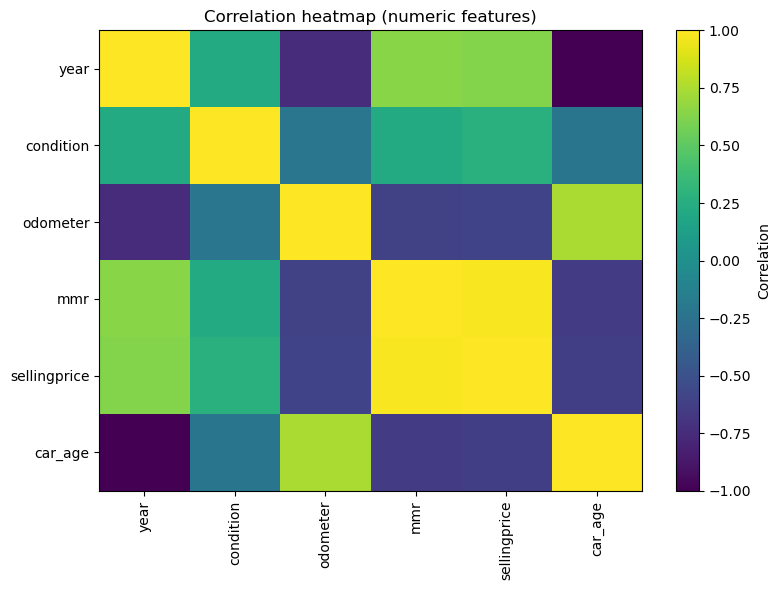

,year,condition,odometer,mmr,sellingprice,car_age
year,1.000000,0.224605,-0.745619,0.646295,0.632459,-1.000000
condition,0.224605,1.000000,-0.214797,0.222253,0.268089,-0.224605
odometer,-0.745619,-0.214797,1.000000,-0.609954,-0.596434,0.745619
mmr,0.646295,0.222253,-0.609954,1.000000,0.980177,-0.646295
sellingprice,0.632459,0.268089,-0.596434,0.980177,1.000000,-0.632459
car_age,-1.000000,-0.224605,0.745619,-0.646295,-0.632459,1.000000


In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

print("Numeric columns used for correlation:")
print(numeric_df.columns.tolist())

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Correlation heatmap (numeric features)")
plt.tight_layout()
plt.show()

corr_matrix


### 3.2 Plot average selling price by year and explain the pattern

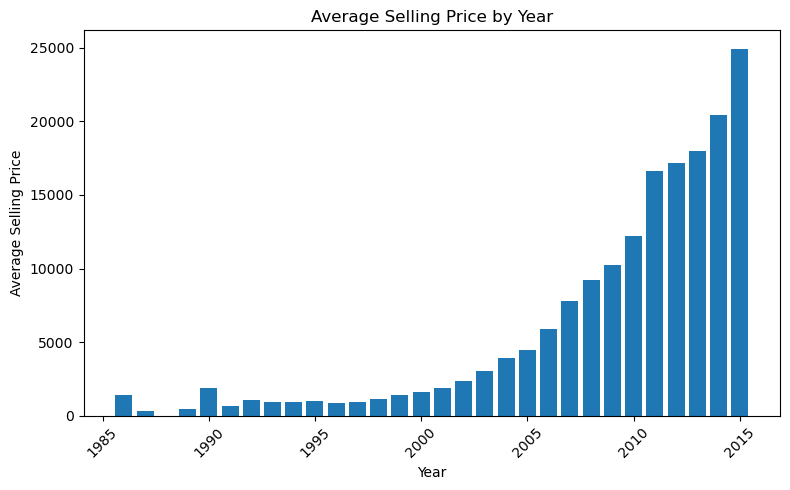

,year,sellingprice
0,1986,1400.000000
1,1987,300.000000
2,1989,425.000000
3,1990,1860.714286
4,1991,661.111111
5,1992,1077.173913
6,1993,902.884615
7,1994,952.604167
8,1995,1029.787234
9,1996,847.932331


In [21]:
avg_price_by_year = df.groupby(year_col)[price_col].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_price_by_year[year_col], avg_price_by_year[price_col])
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_price_by_year


### 3.3 Plot a graph to show average selling price by odometer

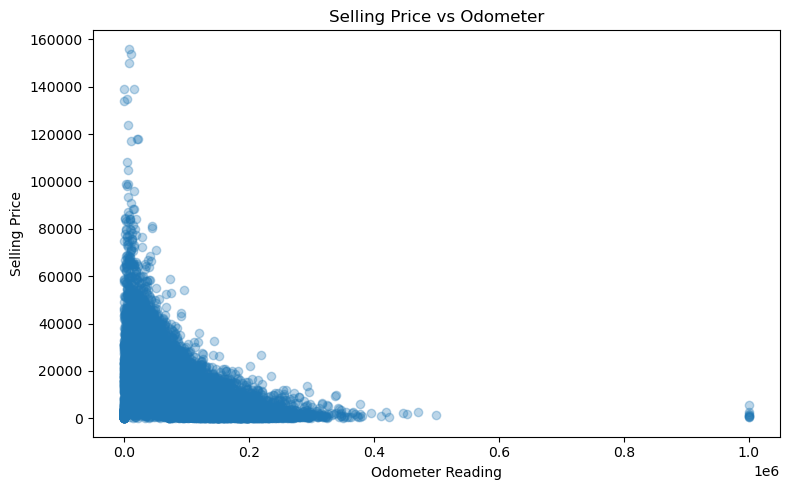

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(df[odo_col], df[price_col], alpha=0.3)
plt.xlabel("Odometer Reading")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Odometer")
plt.tight_layout()
plt.show()


### 3.4 Plot number of cars sold in each state and find the top 3 highest car selling states

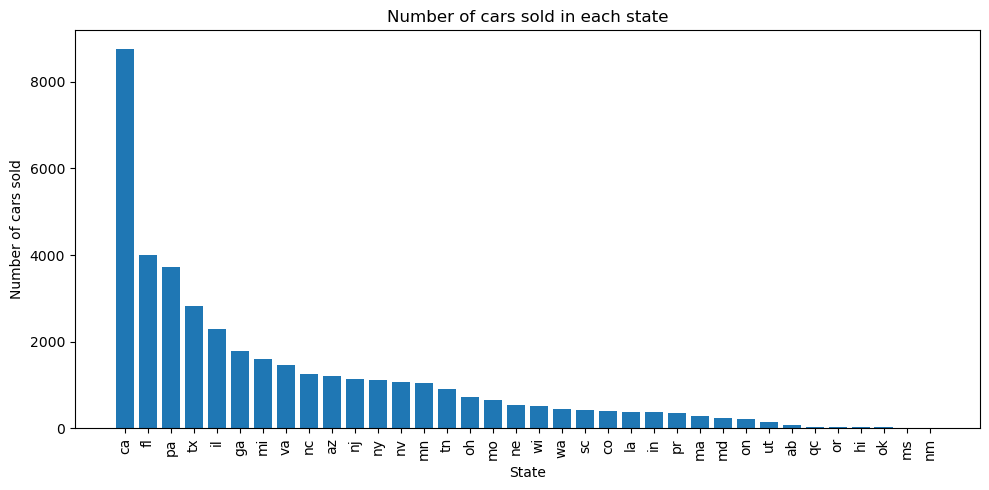

Top 3 highest car selling states:


state
ca    8747
fl    3989
pa    3723
Name: count, dtype: int64

In [23]:
if state_col is None:
    state_col = col_map.get("state")

if state_col is None:
    print("State column not detected. Please set col_map['state'].")
else:
    cars_per_state = df[state_col].value_counts()

    plt.figure(figsize=(10, 5))
    plt.bar(cars_per_state.index, cars_per_state.values)
    plt.xlabel("State")
    plt.ylabel("Number of cars sold")
    plt.title("Number of cars sold in each state")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print("Top 3 highest car selling states:")
    display(cars_per_state.head(3))


### 3.5 Plot a bar graph of average selling price by condition score ranges of size 5

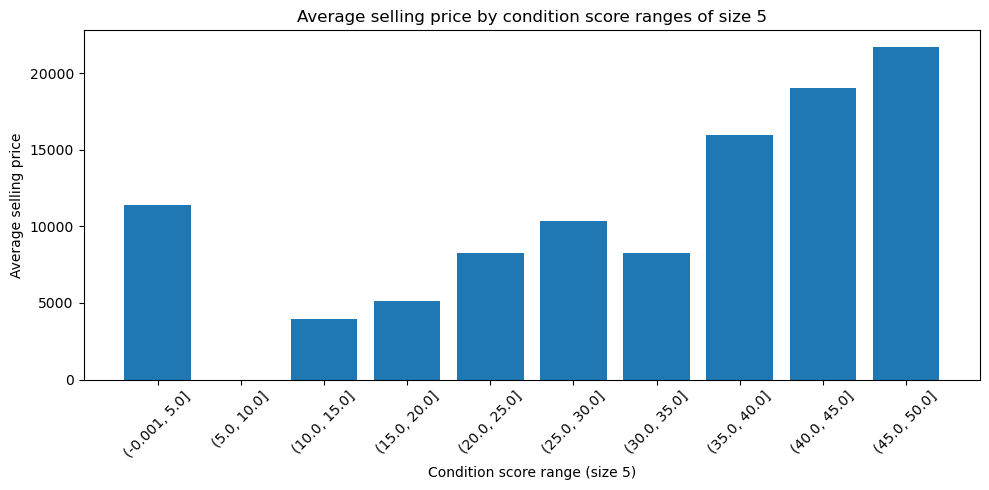

In [24]:
cond_col = col_map.get("condition", cond_col)

if cond_col is None:
    print("Condition column not detected. Please set col_map['condition'].")
else:
    cond_series = df[cond_col]
    min_c = int(cond_series.min())
    max_c = int(cond_series.max())

    # Create bins of size 5
    bins_5 = list(range((min_c // 5) * 5, ((max_c // 5) + 1) * 5 + 1, 5))
    df["condition_bin_5"] = pd.cut(cond_series, bins=bins_5, include_lowest=True)

    avg_price_by_cond_bin = df.groupby("condition_bin_5")[price_col].mean()

    plt.figure(figsize=(10, 5))
    plt.bar(avg_price_by_cond_bin.index.astype(str), avg_price_by_cond_bin.values)
    plt.xlabel("Condition score range (size 5)")
    plt.ylabel("Average selling price")
    plt.title("Average selling price by condition score ranges of size 5")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    avg_price_by_cond_bin


### 3.6 Plot a bar graph of number of cars sold by condition ranges of size 10

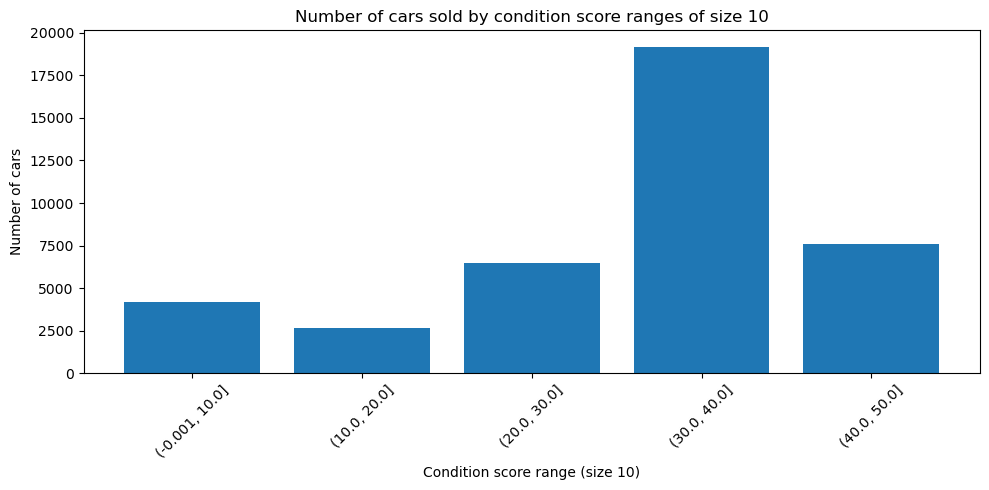

In [25]:
if cond_col is None:
    cond_col = col_map.get("condition")

if cond_col is None:
    print("Condition column not detected. Please set col_map['condition'].")
else:
    cond_series = df[cond_col]
    min_c = int(cond_series.min())
    max_c = int(cond_series.max())

    # Create bins of size 10
    bins_10 = list(range((min_c // 10) * 10, ((max_c // 10) + 1) * 10 + 1, 10))
    df["condition_bin_10"] = pd.cut(cond_series, bins=bins_10, include_lowest=True)

    count_by_cond_bin = df["condition_bin_10"].value_counts().sort_index()

    plt.figure(figsize=(10, 5))
    plt.bar(count_by_cond_bin.index.astype(str), count_by_cond_bin.values)
    plt.xlabel("Condition score range (size 10)")
    plt.ylabel("Number of cars")
    plt.title("Number of cars sold by condition score ranges of size 10")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    count_by_cond_bin


### 3.7 Box plot of car selling prices grouped by color (with and without outliers)

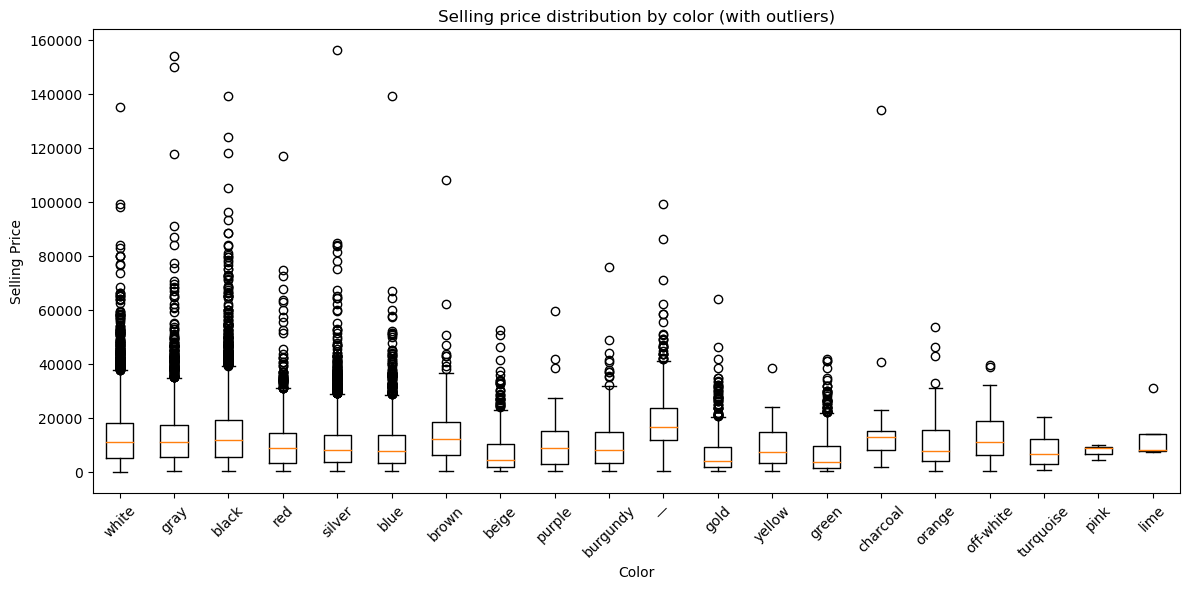

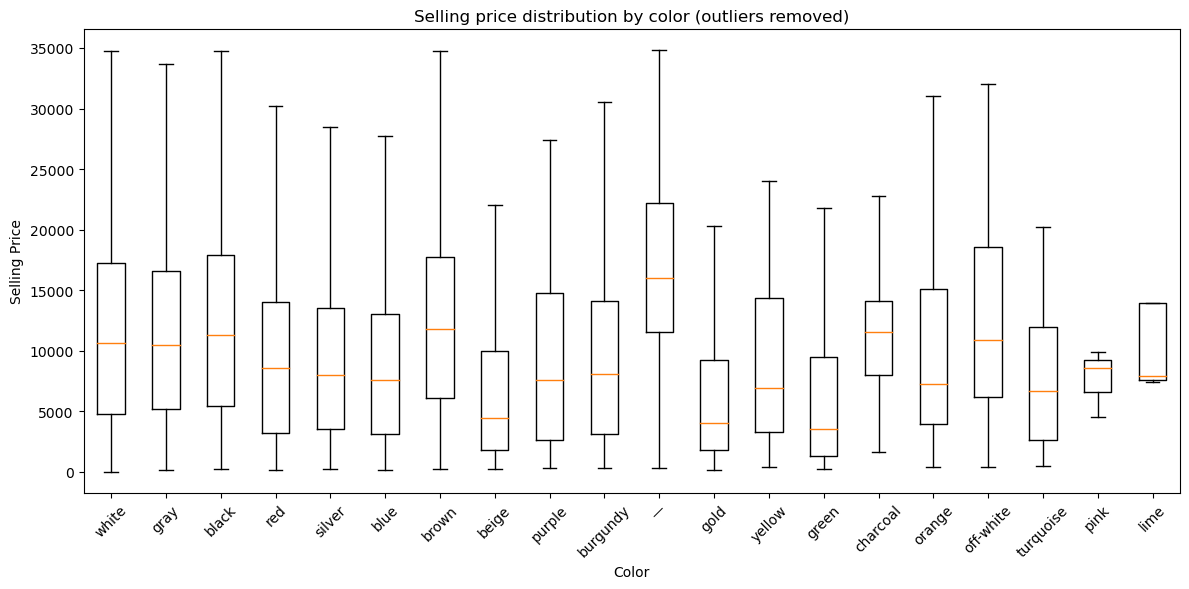

In [28]:
color_col = col_map.get("color", color_col)

if color_col is None:
    print("Color column not detected. Please set col_map['color'].")
else:
    # Boxplot with all data (including outliers)
    colors = df[color_col].unique()

    plt.figure(figsize=(12, 6))
    data = [df[df[color_col] == c][price_col] for c in colors]
    plt.boxplot(data, labels=colors, showfliers=True)
    plt.xlabel("Color")
    plt.ylabel("Selling Price")
    plt.title("Selling price distribution by color (with outliers)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Remove outliers using IQR on price
    Q1 = df[price_col].quantile(0.25)
    Q3 = df[price_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[price_col] >= lower_bound) & (df[price_col] <= upper_bound)]

    colors_no = df_no_outliers[color_col].unique()
    plt.figure(figsize=(12, 6))
    data_no = [df_no_outliers[df_no_outliers[color_col] == c][price_col] for c in colors_no]
    plt.boxplot(data_no, labels=colors_no, showfliers=False)
    plt.xlabel("Color")
    plt.ylabel("Selling Price")
    plt.title("Selling price distribution by color (outliers removed)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
